**DECISION TREE CLASSIFIER**

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define constants
COUNT_THRESHOLD = 5  # Count threshold for labeling a node as a leaf
MAX_DEPTH = 3  # Maximum depth for the decision tree

In [21]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = 'car_evaluation.csv'  # Based on your uploaded file
df = pd.read_csv(filename)

# Convert to list-of-lists format for tree processing
data = df.values.tolist()


Saving car_evaluation.csv to car_evaluation (2).csv


In [22]:
# Define Gini calculation
from collections import Counter

def calculate_gini(data):
    labels = [row[-1] for row in data]
    label_counts = Counter(labels)
    total = len(data)
    gini = 1
    for count in label_counts.values():
        prob = count / total
        gini -= prob ** 2
    return gini


In [23]:
# Data splitter
def split_data(data, attribute_index, value):
    return [row for row in data if row[attribute_index] == value]


In [24]:
# Best split finder
def find_best_split(data):
    best_gini = float('inf')
    best_attribute_index = None
    best_value = None
    num_features = len(data[0]) - 1
    for attribute_index in range(num_features):
        unique_values = set(row[attribute_index] for row in data)
        for value in unique_values:
            subset = split_data(data, attribute_index, value)
            if len(subset) == 0 or len(subset) == len(data):
                continue
            gini = calculate_gini(subset)
            if gini < best_gini:
                best_gini = gini
                best_attribute_index = attribute_index
                best_value = value
    return best_attribute_index, best_value


In [38]:
# Build the decision tree
def build_tree(data, max_depth=4, count_threshold=3, depth=0):
    labels = [row[-1] for row in data]
    label_counts = Counter(labels)

    if len(label_counts) == 1:
        return labels[0]
    if depth >= max_depth or len(data) < count_threshold:
        return label_counts.most_common(1)[0][0]

    best_attr, best_val = find_best_split(data)
    if best_attr is None:
        return label_counts.most_common(1)[0][0]

    left_data = split_data(data, best_attr, best_val)
    right_data = [row for row in data if row[best_attr] != best_val]

    left_subtree = build_tree(left_data, max_depth, count_threshold, depth + 1)
    right_subtree = build_tree(right_data, max_depth, count_threshold, depth + 1)

    return {
        "attribute": best_attr,
        "value": best_val,
        "left": left_subtree,
        "right": right_subtree
    }

tree = build_tree(data)


In [26]:
# Predict function for one instance
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree
    attr_index = tree["attribute"]
    split_value = tree["value"]
    if instance[attr_index] == split_value:
        return predict(tree["left"], instance)
    else:
        return predict(tree["right"], instance)


In [28]:
# Example instance (dictionary form: attribute_index → value)
test_instance = {
    0: 'med', 1: 'high', 2: '4', 3: 'more', 4: 'big', 5: 'high'
}
print("Predicted class:", predict(tree, test_instance))


Predicted class: acc


In [33]:
import matplotlib.pyplot as plt

def draw_tree(tree, attribute_names, x=0.5, y=1.0, x_offset=0.25, y_offset=0.1, ax=None, depth=0):
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 8))
        ax.axis('off')  # No axes

    if not isinstance(tree, dict):
        ax.text(x, y, f"Predict: {tree}", fontsize=10, ha='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", edgecolor="black"))
        return

    attr = tree["attribute"]
    val = tree["value"]
    label = f"{attribute_names[attr]} = {val}"

    ax.text(x, y, label, fontsize=11, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", edgecolor="black"))

    left_x = x - x_offset / (depth + 1)
    left_y = y - y_offset
    ax.plot([x, left_x], [y, left_y], 'k-')
    draw_tree(tree["left"], attribute_names, left_x, left_y, x_offset, y_offset, ax, depth + 1)

    right_x = x + x_offset / (depth + 1)
    right_y = y - y_offset
    ax.plot([x, right_x], [y, right_y], 'k-')
    draw_tree(tree["right"], attribute_names, right_x, right_y, x_offset, y_offset, ax, depth + 1)

    if depth == 0:
        plt.show()




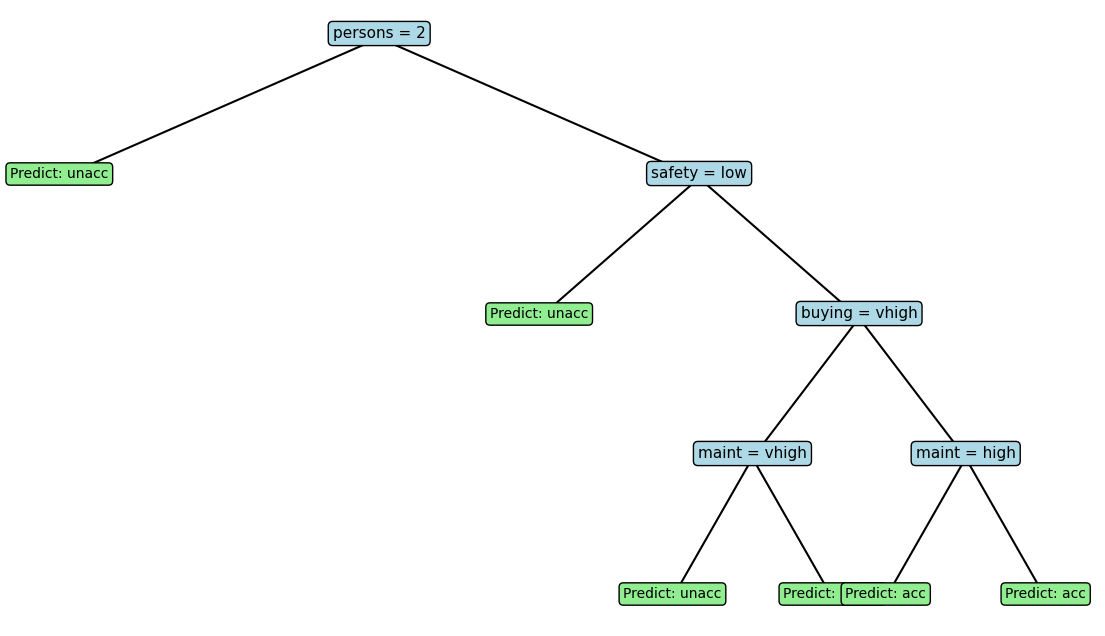

In [34]:
attribute_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
draw_tree(tree, attribute_names)

In [43]:
# Test instance from car_evaluation.csv
test_instance = {
    0: 'low',      # buying price
    1: 'high',     # maintenance cost
    2: '4',        # number of doors
    3: 'more',     # seating capacity
    4: 'big',      # luggage boot
    5: 'high'      # safety
}

prediction = predict(tree, test_instance)
print("\nPrediction for test instance:", prediction)
print("\nPrediction for test instance:", "Yes" if prediction == 1 else "No")



Prediction for test instance: acc

Prediction for test instance: No
